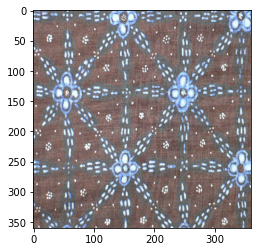

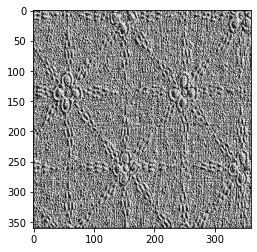

LBP Program is finished


In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1

    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass

    return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))

    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

path = './dataset/training/ceplok-style/TC1.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)

# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                    np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")

In [4]:
from skimage.feature import local_binary_pattern

radius = 2
n_points = 8 * radius
METHOD = 'uniform'
plt.rcParams['font.size'] = 9

# make function of LBP
def getdataTest(img):
    img_lbp = local_binary_pattern(img, n_points, radius, METHOD)
    img_lbp_hist,bins = np.histogram(img_lbp.ravel(),256,[0,256])
    img_lbp_hist = np.transpose(img_lbp_hist[0:18,np.newaxis])
    return img_lbp_hist

path = './dataset/testing/parang_style/YK063.jpg'
img_test = cv2.imread(path, 2)
print(getdataTest(img_test))

[[ 2365  3347  3373  2708  2127  3077  5156 16241 36744 16677  4041  2460
   2109  2682  3480  3336  3293 16384]]


In [8]:
# checking image after LBP process

path = './dataset/testing/parang_style/YK063.jpg'
img = cv2.imread(path, 2)
img_lbp = local_binary_pattern(img, n_points, radius, METHOD)

print(img_lbp)
img_lbp.shape

[[ 2.  3.  6. ...  5.  6.  5.]
 [ 3.  4.  8. ...  5.  7.  6.]
 [ 1. 17.  8. ...  9.  8.  7.]
 ...
 [ 8.  8.  8. ...  8. 17. 17.]
 [ 6.  6.  6. ...  5.  1.  0.]
 [ 5.  5.  5. ...  4.  1.  0.]]


(360, 360)

In [9]:
# checking image of LBP result then convert to histogram

img_lbp_hist,bins = np.histogram(img_lbp.ravel(),256,[0,256])
print(img_lbp_hist)
img_lbp_hist.shape

[ 2365  3347  3373  2708  2127  3077  5156 16241 36744 16677  4041  2460
  2109  2682  3480  3336  3293 16384     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

(256,)

In [12]:
# checking image in histogram shape and then do tranpose

img_lbp_hist_transpose = np.transpose(img_lbp_hist[0:256,np.newaxis])
print(img_lbp_hist_transpose)
img_lbp_hist_transpose.shape

[[ 2365  3347  3373  2708  2127  3077  5156 16241 36744 16677  4041  2460
   2109  2682  3480  3336  3293 16384     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

(1, 256)